In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Downloads/TimeSeries Datasets/Temperature.csv")
df.columns = ['ds','y']
df.head()

,ds,y
0,1/1/81,20.7
1,1/2/81,17.9
2,1/3/81,18.8
3,1/4/81,14.6
4,1/5/81,15.8


In [3]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [30]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [31]:
future = m.make_future_dataframe(periods=31, freq='D')

In [32]:
#It adds the future forecasting period to the dataset
future

,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3678,1991-01-27
3679,1991-01-28
3680,1991-01-29
3681,1991-01-30


In [33]:
forecast = m.predict(future)

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,18.921749,11.670468,18.730808,18.921749,18.921749,-3.740417,-3.740417,-3.740417,-7.069527,...,0.010910,0.010910,0.010910,3.318200,3.318200,3.318200,0.0,0.0,0.0,15.181333
1,1981-01-02,18.919931,11.756045,18.988007,18.919931,18.919931,-3.693681,-3.693681,-3.693681,-7.069527,...,-0.019883,-0.019883,-0.019883,3.395728,3.395728,3.395728,0.0,0.0,0.0,15.226250
2,1981-01-03,18.918113,12.045640,18.750252,18.918113,18.918113,-3.658354,-3.658354,-3.658354,-7.069527,...,-0.061598,-0.061598,-0.061598,3.472770,3.472770,3.472770,0.0,0.0,0.0,15.259759
3,1981-01-04,18.916295,11.814896,18.374987,18.916295,18.916295,-3.674568,-3.674568,-3.674568,-7.069527,...,-0.153122,-0.153122,-0.153122,3.548081,3.548081,3.548081,0.0,0.0,0.0,15.241726
4,1981-01-05,18.914476,12.140912,18.921581,18.914476,18.914476,-3.467105,-3.467105,-3.467105,-7.069527,...,-0.018019,-0.018019,-0.018019,3.620441,3.620441,3.620441,0.0,0.0,0.0,15.447371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,1991-01-27,18.639767,11.985772,18.538507,18.639767,18.639767,-3.447141,-3.447141,-3.447141,-7.069527,...,-0.153122,-0.153122,-0.153122,3.775508,3.775508,3.775508,0.0,0.0,0.0,15.192626
3679,1991-01-28,18.639771,11.927641,18.642750,18.639771,18.639771,-3.318726,-3.318726,-3.318726,-7.069527,...,-0.018019,-0.018019,-0.018019,3.768820,3.768820,3.768820,0.0,0.0,0.0,15.321045
3680,1991-01-29,18.639774,12.025216,19.063380,18.639774,18.639774,-3.222348,-3.222348,-3.222348,-7.069527,...,0.078436,0.078436,0.078436,3.768743,3.768743,3.768743,0.0,0.0,0.0,15.417427
3681,1991-01-30,18.639778,12.231443,18.785996,18.639778,18.639778,-3.130430,-3.130430,-3.130430,-7.069527,...,0.163276,0.163276,0.163276,3.775821,3.775821,3.775821,0.0,0.0,0.0,15.509348


In [35]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(31)

,ds,yhat_lower,yhat_upper,yhat
3652,1991-01-01,11.573404,18.511420,14.928225
3653,1991-01-02,11.698361,18.658312,15.090376
3654,1991-01-03,11.516848,18.568401,15.015455
3655,1991-01-04,11.497949,18.471542,15.060996
3656,1991-01-05,11.794382,18.580312,15.093270
3657,1991-01-06,11.515846,18.251728,15.072193
3658,1991-01-07,11.898714,18.530299,15.273082
3659,1991-01-08,11.814820,18.982927,15.429649
3660,1991-01-09,11.993512,19.244633,15.568050
3661,1991-01-10,12.296037,19.132464,15.461977


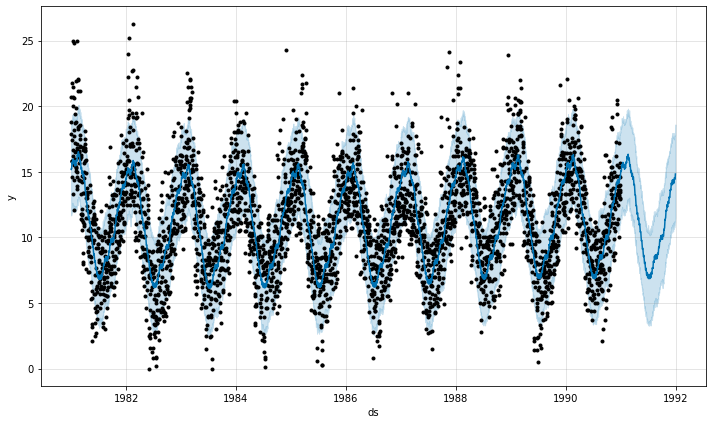

In [28]:
m.plot(forecast);